In [11]:
import pandas as pd

# CSV 파일에서 데이터 읽기
df1 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231005_113421.csv')
df2 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231005_113433.csv')
df3 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231005_113442.csv')
df4 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231006_103959.csv')
df5 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231006_104100.csv')
df6 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231006_104217.csv')
df7 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231006_175233.csv')
df8 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231006_175318.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 44
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case            275 non-null    object 
 1   gate length     275 non-null    int64  
 2   Theta           275 non-null    float64
 3   Phi             275 non-null    float64
 4   dt              275 non-null    float64
 5   combination     275 non-null    object 
 6   total time      275 non-null    float64
 7   computing time  275 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 19.3+ KB


array([[<Axes: title={'center': 'gate length'}>,
        <Axes: title={'center': 'Theta'}>],
       [<Axes: title={'center': 'Phi'}>, <Axes: title={'center': 'dt'}>],
       [<Axes: title={'center': 'total time'}>,
        <Axes: title={'center': 'computing time'}>]], dtype=object)

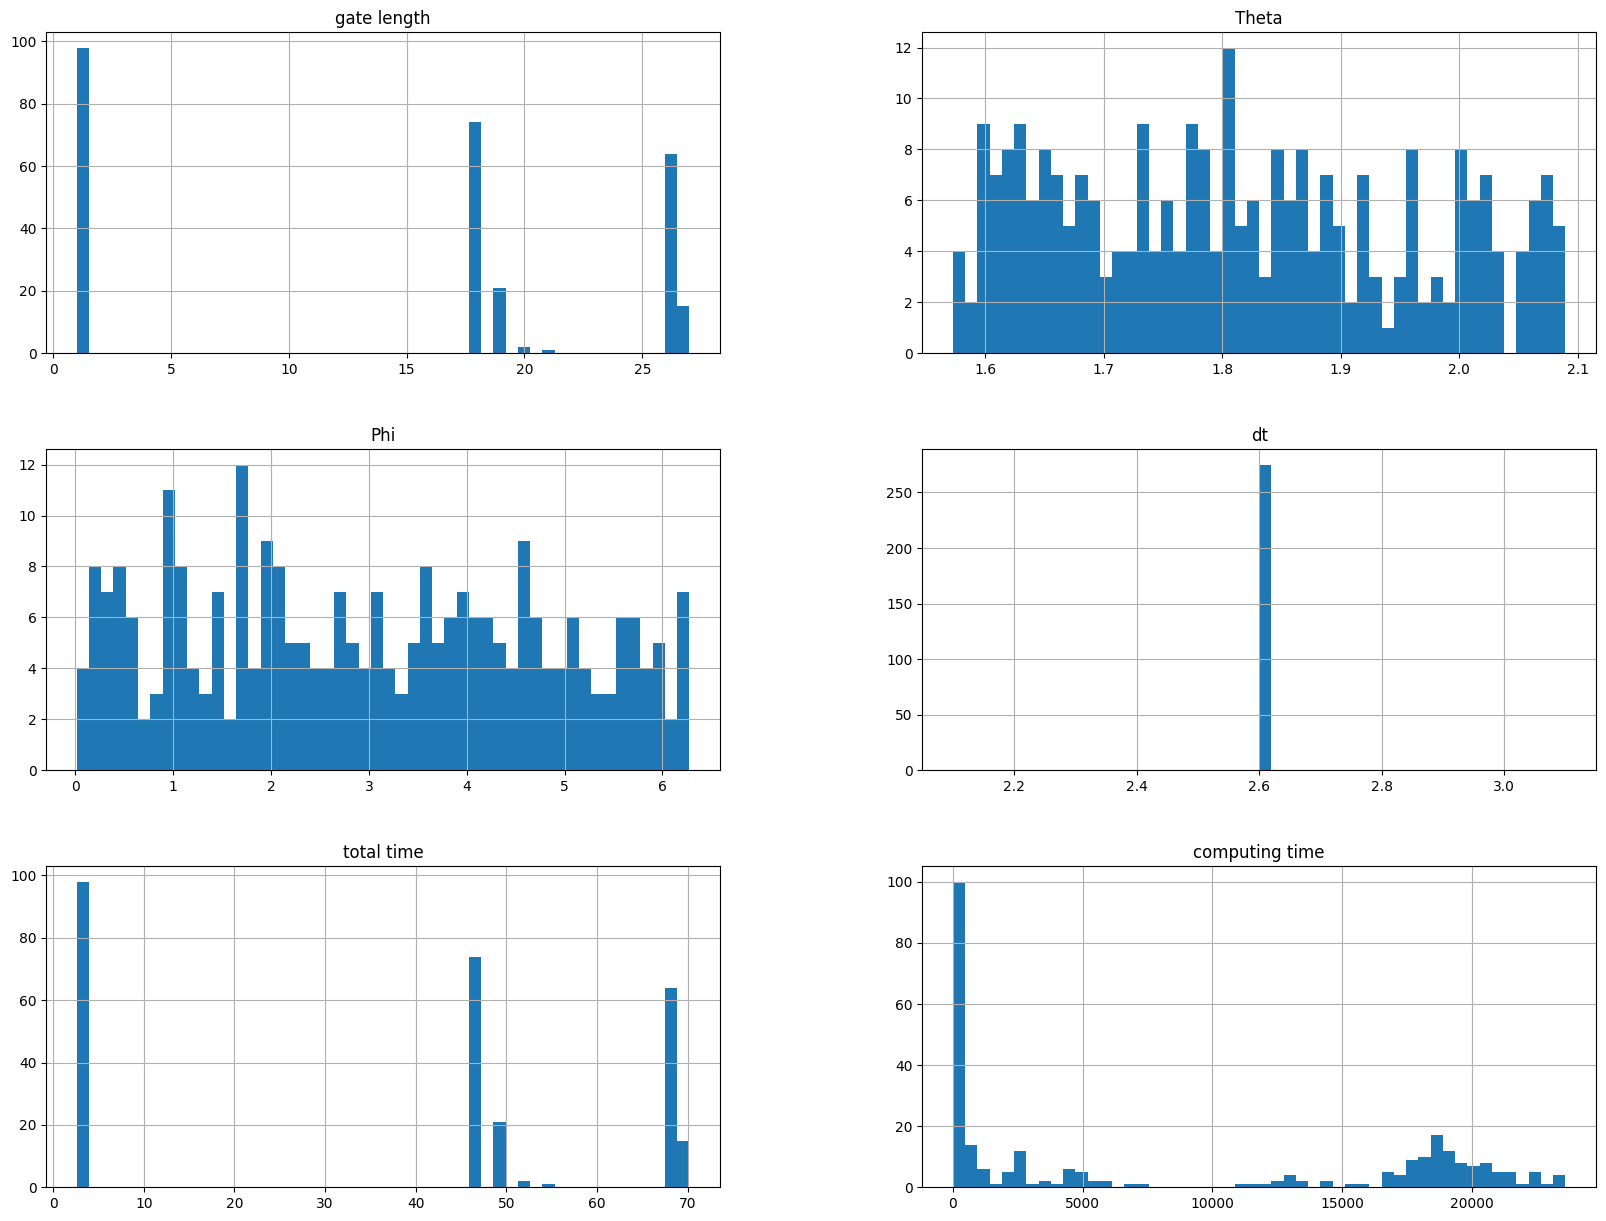

In [12]:
import matplotlib as plt

%matplotlib inline
df.hist(bins=50, figsize=(20,15))

# 히스토그램(주어진 값 범위 수평축, 샘플 수 수직축)

<Axes: xlabel='Theta', ylabel='Phi'>

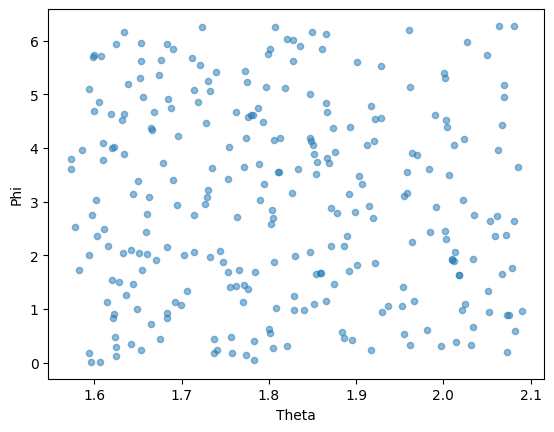

In [13]:
df.plot(kind = "scatter", x="Theta", y="Phi", alpha=0.5)

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 44
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case            98 non-null     object 
 1   gate length     98 non-null     int64  
 2   Theta           98 non-null     float64
 3   Phi             98 non-null     float64
 4   dt              98 non-null     float64
 5   combination     98 non-null     object 
 6   total time      98 non-null     float64
 7   computing time  98 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.9+ KB


<Axes: xlabel='Theta', ylabel='Phi'>

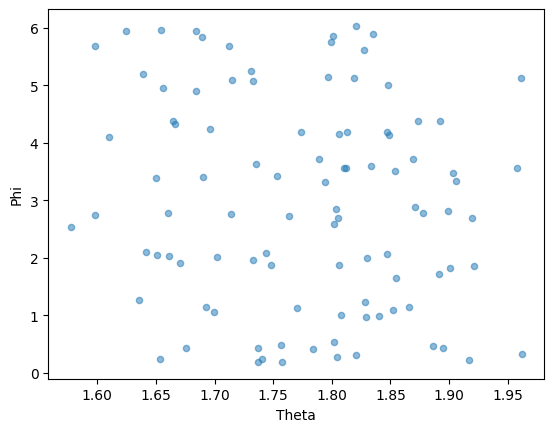

In [14]:
df_min1 = df[df['combination'] == '[-1]']

df_min1.info()

df_min1.plot(kind = "scatter", x="Theta", y="Phi", alpha=0.5)

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 2 to 42
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case            177 non-null    object 
 1   gate length     177 non-null    int64  
 2   Theta           177 non-null    float64
 3   Phi             177 non-null    float64
 4   dt              177 non-null    float64
 5   combination     177 non-null    object 
 6   total time      177 non-null    float64
 7   computing time  177 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.4+ KB


<Axes: xlabel='Theta', ylabel='Phi'>

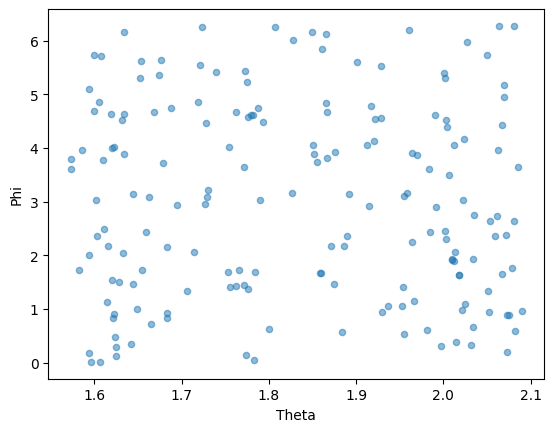

In [15]:
df_non_min1 = df[df['combination'] != '[-1]']

df_non_min1.info()

df_non_min1.plot(kind = "scatter", x="Theta", y="Phi", alpha=0.5)